In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
fchl_out = pd.read_csv("../out/output_FCHL.csv", index_col=0)

In [5]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_6123', 'qm7_51']","[[], [6, 6]]",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ..."
1,2,"['qm7_51', 'qm7_6123']","[[6, 6], []]",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5..."
2,3,"['qm7_51', 'qm7_6232']","[[6, 6], []]",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5..."
3,4,"['qm7_6123', 'qm7_51']","[[], [6, 6]]",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ..."
4,5,"['qm7_86', 'qm7_6123']","[[6, 6], [6]]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3..."
...,...,...,...,...,...,...
995,996,"['qm7_0', 'qm7_4758', 'qm7_0', 'qm7_47']","[[], [6, 6], [], [6, 6]]",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5..."
996,997,"['qm7_990', 'qm7_5265']","[[6, 6], [6, 6]]",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1..."
997,998,"['qm7_918', 'qm7_6045']","[[6], [6, 6, 6]]",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2..."
998,999,"['qm7_1055', 'qm7_0', 'qm7_6315']","[[6, 6, 6, 6], [], [6]]",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ..."


In [6]:
from ast import literal_eval 

In [7]:
fchl_out["Fragments"] = fchl_out["Fragments"].apply(literal_eval)

In [8]:
fchl_out["Sorted Fragments"] = fchl_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(fchl_out["Sorted Fragments"]))

837

In [58]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [18]:
fchl_out["Excess"] = fchl_out["Fragments"].apply(get_excess_frags)

In [19]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]"
1,2,"[qm7_51, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6123]"
2,3,"[qm7_51, qm7_6232]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6232]"
3,4,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]"
4,5,"[qm7_86, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3...","[qm7_6123, qm7_86]"
...,...,...,...,...,...,...,...
995,996,"[qm7_0, qm7_4758, qm7_0, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5...","[qm7_0, qm7_0, qm7_47, qm7_4758]"
996,997,"[qm7_990, qm7_5265]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1...","[qm7_5265, qm7_990]"
997,998,"[qm7_918, qm7_6045]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, ...",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2...","[qm7_6045, qm7_918]"
998,999,"[qm7_1055, qm7_0, qm7_6315]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ...","[qm7_0, qm7_1055, qm7_6315]"


In [20]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# need ncharges list and list of energies

In [23]:
import qml

In [24]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [25]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [26]:
ncharges = [mol.nuclear_charges for mol in mols]

In [27]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [28]:
energies = qm7["energy / Ha"].to_list()

In [29]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [30]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [31]:
coeff_energies = reg.coef_

In [32]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [33]:
coeff_energies = dict(zip(elements, coeff_energies))

In [60]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    print('filename', filename, 'energy', float(energy))
    return float(energy)

In [61]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [62]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    print('excess ncharges', excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    print('rxn energy', rxn_energy)
    return rxn_energy

In [72]:
-245.578-359.958-(-487.817-6*0.61-3*38.019)

-0.002000000000066393

In [73]:
-0.002000000000066393*627.5

-1.2550000000416617

In [63]:
fchl_out["energies / Ha"] = fchl_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.]
filename qm7_6123 energy -359.91193164601896
filename qm7_51 energy -208.720197958732
rxn energy 0.1036774012430044
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.]
filename qm7_51 energy -208.720197958732
filename qm7_6123 energy -359.91193164601896
rxn energy 0.1036774012430044
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.]
filename qm7_51 energy -208.720197958732
filename qm7_6232 energy -361.16966213475405
rxn energy 0.0660037592150502
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.]
filename qm7_6123 energy -359.91193164601896
filename qm7_51 energy -208.720197958732
rxn energy 0.1036774012430044
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_86 energy -245.577645020992
filename qm7_6123 energy -359.91193164601896
rxn energy 0.04523816138757297
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.]
filename qm7_51 energy -208.720197958732
filename qm7_5422 energy -361.140829081148
rxn energy 0.09483681282108591
excess 

filename qm7_92 energy -246.828806578945
filename qm7_5463 energy -362.296133445619
rxn energy 0.07004534395593964
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_94 energy -248.05622680457
filename qm7_6117 energy -361.09502560583604
rxn energy 0.04373295811387834
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_1014 energy -287.254761528663
filename qm7_6144 energy -358.696000910955
rxn energy 0.04323075130656662
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_5402 energy -363.548584263243
filename qm7_92 energy -246.828806578945
rxn energy 0.037651373039096825
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_1 energy -79.66519392527199
filename qm7_6086 energy -359.972032918132
filename qm7_51 energy -208.720197958732
rxn energy 0.07668208220286488
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5925 energy -338.81389282200803
filename qm

filename qm7_92 energy -246.828806578945
rxn energy 0.07696483541690213
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_5403 energy -362.285682759494
filename qm7_87 energy -245.616950501695
rxn energy 0.07229526062374703
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_1108 energy -284.879496156735
filename qm7_6390 energy -358.607780766434
rxn energy 0.06660257434123196
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_92 energy -246.828806578945
filename qm7_5369 energy -362.289213954158
rxn energy 0.07696483541690213
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_6311 energy -361.16069887518603
filename qm7_0 energy -40.428678039299996
filename qm7_49 energy -208.828806681931
rxn energy -0.003141381189976755
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_6149 energy -359.87868441484
filename qm7_1014 energy -287.254761528663
rxn energy 0.08060409412874492
e

filename qm7_5418 energy -363.541720087635
rxn energy 0.037152169729267825
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_10 energy -116.41989591901
filename qm7_6123 energy -359.91193164601896
filename qm7_51 energy -208.720197958732
rxn energy 0.18108918298247545
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5981 energy -325.311537081044
filename qm7_5987 energy -359.913745857052
rxn energy 0.007831768647463377
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_4752 energy -359.94915612233297
filename qm7_47 energy -208.741071638824
filename qm7_0 energy -40.428678039299996
rxn energy 0.07607956806293714
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_1108 energy -284.879496156735
filename qm7_5 energy -153.538244580185
filename qm7_85 energy -246.76945814023603
rxn energy 0.04591582958738627
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.

filename qm7_3604 energy -343.832408345745
rxn energy 0.1466998455759949
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6289 energy -359.883388126177
filename qm7_5294 energy -340.117403331374
rxn energy 0.0309060947791977
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5977 energy -324.123320495276
filename qm7_6318 energy -358.61588344724
rxn energy 0.05379707081306151
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_795 energy -305.899088208839
filename qm7_5027 energy -340.072058079986
rxn energy 0.022846902099615818
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6315 energy -361.13045168378096
filename qm7_5466 energy -341.23778164188803
rxn energy 0.10357792007545186
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5406 energy -340.089286982589
filename qm7_6086 energy -359.972032918132
rxn energy -0.02962234839071698
excess ncharges [1. 1. 1. 1. 1

filename qm7_6007 energy -338.928740212452
filename qm7_6289 energy -359.883388126177
rxn energy -0.00048763300591758707
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5822 energy -341.304732796258
filename qm7_6086 energy -359.972032918132
rxn energy -0.02501131535260015
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_0 energy -40.428678039299996
filename qm7_49 energy -208.828806681931
filename qm7_6289 energy -359.883388126177
rxn energy 0.05411252111196063
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_752 energy -304.663905717316
filename qm7_5925 energy -338.81389282200803
filename qm7_0 energy -40.428678039299996
rxn energy 0.10658128141218981
excess ncharges [1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6045 energy -338.918445210222
filename qm7_6289 energy -359.883388126177
rxn energy 0.009807369224091644
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5

filename qm7_5402 energy -363.548584263243
filename qm7_989 energy -287.296010520784
rxn energy 0.02962579372598384
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_5007 energy -359.913532583917
filename qm7_85 energy -246.76945814023603
rxn energy 0.071880950952675
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5987 energy -359.913745857052
filename qm7_4991 energy -340.10092432228197
rxn energy 0.01702737299626733
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5342 energy -324.048443510448
filename qm7_6234 energy -361.148263761667
rxn energy 0.03640743462841556
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6178 energy -361.096451381339
filename qm7_5408 energy -341.234618461627
rxn energy 0.1407414027784739
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_5447 energy -341.244271658189
filename qm7_768 energy -307.124147493306
rxn ener

filename qm7_6059 energy -338.835159660717
filename qm7_6086 energy -359.972032918132
rxn energy 0.004448126774065031
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5987 energy -359.913745857052
filename qm7_4991 energy -340.10092432228197
rxn energy 0.01702737299626733
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_5450 energy -340.028328763264
filename qm7_768 energy -307.124147493306
rxn energy 0.061573781061639465
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_989 energy -287.296010520784
filename qm7_5417 energy -361.134677262115
rxn energy 0.0034191014398174957
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5342 energy -324.048443510448
filename qm7_6405 energy -361.092764570146
rxn energy 0.09190662614940948
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5311 energy -326.45056995950296
filename qm7_6177 energy

filename qm7_5968 energy -322.85683596955397
filename qm7_6150 energy -361.08997493911903
rxn energy 0.06624695136324021
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6149 energy -359.87868441484
filename qm7_5408 energy -341.234618461627
rxn energy 0.1384515225703069
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_92 energy -246.828806578945
filename qm7_4167 energy -361.102587776887
filename qm7_0 energy -40.428678039299996
rxn energy 0.07403448920683786
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_986 energy -287.298702120067
filename qm7_5367 energy -361.15972569119697
rxn energy -0.024320926925156527
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_5285 energy -359.89222102650496
filename qm7_980 energy -286.060948907721
rxn energy 0.040823256698502064
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5306 energy -340.05

filename qm7_995 energy -284.836761471542
filename qm7_6085 energy -361.198262076037
rxn energy -0.04103035665440302
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6296 energy -361.137361178544
filename qm7_5294 energy -340.117403331374
rxn energy -0.0030101108806377397
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5032 energy -340.06119164614
filename qm7_3483 energy -346.295840219229
rxn energy 0.09613968808153572
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_6293 energy -361.137621768658
filename qm7_5107 energy -326.46566839282
rxn energy 0.06993823867958326
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5408 energy -341.234618461627
filename qm7_6123 energy -359.91193164601896
rxn energy 0.10520429139145904
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.]
filename qm7_5427 energy -361.09266375706
filename qm7_

filename qm7_752 energy -304.663905717316
filename qm7_0 energy -40.428678039299996
filename qm7_5925 energy -338.81389282200803
rxn energy 0.10658128141218981
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_954 energy -286.03037450669
filename qm7_5453 energy -362.292104541421
rxn energy 0.11162783622773986
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5996 energy -322.849159735594
filename qm7_6405 energy -361.092764570146
rxn energy 0.07113355429621038
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_4182 energy -361.067148997343
filename qm7_0 energy -40.428678039299996
filename qm7_98 energy -248.04851720292598
rxn energy 0.10981949147694081
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5433 energy -341.213181164414
filename qm7_5367 energy -361.15972569119697
rxn energy 0.0989043901335549
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

filename qm7_3346 energy -346.295406481515
rxn energy 0.12381540322036244
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6149 energy -359.87868441484
filename qm7_6052 energy -340.112707145601
rxn energy 0.04030599188922679
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5968 energy -322.85683596955397
filename qm7_6265 energy -361.111583606821
rxn energy 0.04463828366121447
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_0 energy -40.428678039299996
filename qm7_4446 energy -362.33267099286104
filename qm7_98 energy -248.04851720292598
rxn energy 0.06435434266603579
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_50 energy -208.812352694174
filename qm7_0 energy -40.428678039299996
filename qm7_5453 energy -362.292104541421
rxn energy 0.10196378703921027
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_0 e

filename qm7_6123 energy -359.91193164601896
filename qm7_4991 energy -340.10092432228197
rxn energy 0.018841584029246405
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_5420 energy -361.17063701911906
filename qm7_99 energy -248.05881337630902
rxn energy -0.03446502690815123
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_922 energy -305.814153071074
filename qm7_5027 energy -340.072058079986
rxn energy 0.10778203986450308
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_5449 energy -342.454824908443
filename qm7_756 energy -305.894371235914
rxn energy 0.08491073998186494
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_5801 energy -341.292424263602
filename qm7_800 energy -307.13573851642997
rxn energy 0.005944104306877307
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  8. 16.]
filename qm7_6675 energy -740.806075403304
filename qm

filename qm7_982 energy -286.071688816861
filename qm7_5367 energy -361.15972569119697
rxn energy -0.01736447042625855
excess ncharges [1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6318 energy -358.61588344724
filename qm7_5120 energy -340.109573712196
rxn energy 0.08618354618707258
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6.]
filename qm7_101 energy -249.219025160742
filename qm7_6408 energy -359.808104222359
rxn energy 0.16785598541889613
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_1056 energy -287.223699733475
filename qm7_0 energy -40.428678039299996
filename qm7_5460 energy -361.08588309899596
rxn energy 0.1550243750938023
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_4579 energy -326.507842132042
filename qm7_6410 energy -359.849771651643
rxn energy 0.0955577697655201
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
file

filename qm7_0 energy -40.428678039299996
filename qm7_4752 energy -359.94915612233297
rxn energy 0.12745357138098257
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5353 energy -341.25531352803904
filename qm7_6123 energy -359.91193164601896
rxn energy 0.08450922497931401
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6316 energy -361.15666662246804
filename qm7_5408 energy -341.234618461627
rxn energy 0.08052616164951587
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_1128 energy -283.546353205029
filename qm7_5461 energy -362.32052596686896
rxn energy 0.12711401902657826
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_5360 energy -342.519356673531
filename qm7_6315 energy -361.13045168378096
rxn energy 0.04205973513967365
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6.]
filename qm7_12 energy -134.909757012745
fil

filename qm7_5449 energy -342.454824908443
filename qm7_877 energy -305.857764665999
rxn energy 0.12151730989683074
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.
 6.]
filename qm7_0 energy -40.428678039299996
filename qm7_0 energy -40.428678039299996
filename qm7_92 energy -246.828806578945
filename qm7_4877 energy -362.309007980653
rxn energy 0.11817145537389706
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_903 energy -308.311220609546
filename qm7_5041 energy -340.117049816224
rxn energy 0.005836458568751368
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_5428 energy -324.032565410672
filename qm7_6384 energy -361.093677970067
rxn energy 0.10687132600440918
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_0 energy -40.428678039299996
filename qm7_47 energy -208.741071638824
filename qm7_0 energy -40.428678039299996
filenam

filename qm7_5 energy -153.538244580185
filename qm7_6070 energy -359.960491616733
rxn energy 0.05439472959022851
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.]
filename qm7_6342 energy -361.095906745003
filename qm7_5985 energy -340.118012968661
rxn energy 0.037834685373439925
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_752 energy -304.663905717316
filename qm7_0 energy -40.428678039299996
filename qm7_6329 energy -340.037467121845
rxn energy 0.10306382828235883
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.]
filename qm7_767 energy -307.105662638128
filename qm7_5120 energy -340.109573712196
rxn energy -0.001186312692283309
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
filename qm7_6086 energy -359.972032918132
filename qm7_1062 energy -284.81701265595404
filename qm7_0 energy -40.428678039299996
rxn energy 0.015391093357436603
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6

filename qm7_6409 energy -361.100828808787
filename qm7_5235 energy -342.482874580079
rxn energy 0.10816470358554398


In [38]:
fchl_out["energies / kcal/mol"] = fchl_out["energies / Ha"] * 627.5

In [39]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]",0.103677,65.057569
1,2,"[qm7_51, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6123]",0.103677,65.057569
2,3,"[qm7_51, qm7_6232]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6232]",0.066004,41.417359
3,4,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]",0.103677,65.057569
4,5,"[qm7_86, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3...","[qm7_6123, qm7_86]",0.045238,28.386946
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_0, qm7_4758, qm7_0, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5...","[qm7_0, qm7_0, qm7_47, qm7_4758]",0.102053,64.038260
996,997,"[qm7_990, qm7_5265]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1...","[qm7_5265, qm7_990]",0.129030,80.966274
997,998,"[qm7_918, qm7_6045]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, ...",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2...","[qm7_6045, qm7_918]",0.031947,20.046845
998,999,"[qm7_1055, qm7_0, qm7_6315]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ...","[qm7_0, qm7_1055, qm7_6315]",0.184290,115.642176


In [48]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

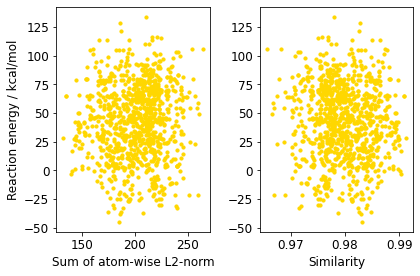

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(fchl_out["ObjValNoPen"]), fchl_out["energies / kcal/mol"], s=10, color='gold')
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-fchl_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, fchl_out["energies / kcal/mol"], s=10, color='gold')
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-fchl.png", dpi=300)
plt.show()